In [15]:
import numpy as np
import cv2
import OpCV_Utils
import random
import matplotlib.pyplot as plt

In [132]:
def img_warping_ref_obj(img, ref_points, ref_obj_W, ref_obj_H, pad=0):
    # ref_points format = np.array([[[p1x, p1y]], [[p2x, p2y]], [[p3x, p3y]], [[p4x, p4y]]])
    
    ###################################################
    # Reordering points if needed:
    reordered_points = np.zeros_like(ref_points)
    points = ref_points.reshape((4,2))
    
    add = points.sum(1)
    reordered_points[0] = points[np.argmin(add)]
    reordered_points[3] = points[np.argmax(add)]
    
    diff = np.diff(points, axis = 1)
    reordered_points[1] = points[np.argmin(diff)]
    reordered_points[2] = points[np.argmax(diff)]
    
    points = reordered_points
    ###################################################
    
    pts1 = np.float32(points)
    pts2 = np.float32([[0,0],[ref_obj_W,0],[0,ref_obj_H],[ref_obj_W,ref_obj_H]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)
    img_warped = cv2.warpPerspective(img, matrix, (ref_obj_W, ref_obj_H))
    img_warped = img_warped[pad:img_warped.shape[0]-pad, pad:img_warped.shape[1]-pad]
    
    return img_warped

In [126]:
def Img_Homography(img, points1, points2, pad=0):
    
    # points format = np.array([[[p1x, p1y]], [[p2x, p2y]], [[p3x, p3y]], [[p4x, p4y]]])
    
    ###################################################
    reordered_points1 = np.zeros_like(points1)
    points1 = points1.reshape((4,2))
    
    add = points1.sum(1)
    reordered_points1[0] = points1[np.argmin(add)]
    reordered_points1[3] = points1[np.argmax(add)]
    
    diff = np.diff(points1, axis = 1)
    reordered_points1[1] = points1[np.argmin(diff)]
    reordered_points1[2] = points1[np.argmax(diff)]
    
    points1 = reordered_points1
    ###################################################
    reordered_points2 = np.zeros_like(points2)
    points2 = points2.reshape((4,2))
    
    add = points2.sum(1)
    reordered_points2[0] = points2[np.argmin(add)]
    reordered_points2[3] = points2[np.argmax(add)]
    
    diff = np.diff(points2, axis = 1)
    reordered_points2[1] = points2[np.argmin(diff)]
    reordered_points2[2] = points2[np.argmax(diff)]
    
    points2 = reordered_points2
    ###################################################
    
    pts1 = np.float32(points1)
    pts2 = np.float32(points2)
    matrix = cv2.getPerspectiveTransform(pts1,pts2)
    w = points2[1][0][0] - points2[0][0][0]
    h = points2[1][0][1] - points2[0][0][1]
    img_warp = cv2.warpPerspective(img, matrix, (w,h))
    img_warp = img_warp[pad:img_warp.shape[0]-pad, pad:img_warp.shape[1]-pad]
    
    return img_warp

In [99]:
image = cv2.imread('ztest_media/cachorros.jpg')
image.shape

(640, 960, 3)

In [101]:
Ax = 30;   Ay = 30
Bx = 400;   By = 50
Cx = 30;  Cy = 500
Dx = 400;  Dy = 520

cv2.circle(image, (Ax,Ay), 5, (255, 0, 0), 5)
cv2.circle(image, (Bx,By), 5, (255, 0, 0), 5)
cv2.circle(image, (Cx,Cy), 5, (255, 0, 0), 5)
cv2.circle(image, (Dx,Dy), 5, (255, 0, 0), 5)

cv2.imshow('wind', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [102]:
W = 400
H = 400
points = np.array([[[Ax, Ay]],
                  [[Bx, By]],
                  [[Cx, Cy]],
                  [[Dx, Dy]]])

print(points)

[[[ 30  30]]

 [[400  50]]

 [[ 30 500]]

 [[400 520]]]


In [112]:
warped = Img_Warping_Ref_Obj(image, points, W, H, pad=0)
print(warped.shape)
cv2.imshow('wind', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()

(400, 400, 3)


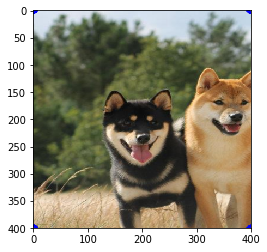

In [89]:
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
plt.imshow(warped)

In [131]:
Ax1 = 30;   Ay1 = 30
Bx1 = 400;   By1 = 50
Cx1 = 30;  Cy1 = 500
Dx1 = 400;  Dy1 = 520

Ax2 = 30+24;   Ay2 = 30+23
Bx2 = 400-50;   By2 = 50-10
Cx2 = 30+34;  Cy2 = 500+10
Dx2 = 400+21;  Dy2 = 520-40

points1 = np.array([[[Ax1, Ay1]], [[Bx1, By1]], [[Cx1, Cy1]], [[Dx1, Dy1]]])
points2 = np.array([[[Ax2, Ay2]], [[Bx2, By2]], [[Cx2, Cy2]], [[Dx2, Dy2]]])

cv2.circle(image, (Ax1,Ay1), 5, (255, 0, 0), 5)
cv2.circle(image, (Bx1,By1), 5, (255, 0, 0), 5)
cv2.circle(image, (Cx1,Cy1), 5, (255, 0, 0), 5)
cv2.circle(image, (Dx1,Dy1), 5, (255, 0, 0), 5)

cv2.circle(image, (Ax2,Ay2), 5, (0, 0, 255), 5)
cv2.circle(image, (Bx2,By2), 5, (0, 0, 255), 5)
cv2.circle(image, (Cx2,Cy2), 5, (0, 0, 255), 5)
cv2.circle(image, (Dx2,Dy2), 5, (0, 0, 255), 5)

cv2.imshow('wind', image)
print(image.shape)
cv2.waitKey(0)
cv2.destroyAllWindows()

warped = Img_Homography(image, points1, points2, pad=0)
print(warped.shape)
cv2.imshow('wind', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()

(640, 960, 3)
(640, 960, 3)


In [133]:
dir(OpCV_Utils)

['Display_Multiple_Images',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'color_filtering',
 'custom_canny',
 'cv2',
 'np',
 'show_multiple_images_plt',
 'time']